In [15]:
def poly(x):
    return (10 - 20*x + 2*(x**2) + (x**4))

def poly_deriv(x):
    return (-20 + 4*x + 4*(x**3))

def step(x, f, fd):
    return (x - f/fd)

In [16]:
X = [0]
F = []
Fd = []

# F.append(poly(X[-1]))
# print(F)
# Fd.append(poly_deriv(X[-1]))
# print(Fd)
# X.append(step(X[-1], F[-1], Fd[-1]))
# print(X)

In [17]:
while True:
    F.append(poly(X[-1]))
    Fd.append(poly_deriv(X[-1]))
    X.append(step(X[-1], F[-1], Fd[-1]))
    if F[-1] < .001:
        break

# for i in range(len(X)):
    
# print(X)
# print(F)
# print(Fd)



IndentationError: expected an indented block (<ipython-input-17-88523f679c06>, line 10)

### 2-5

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return (x**2)

def g1(x):
    return (1 - x)

def g2(x):
    return (x - 2)

X = np.linspace(0, 3)
print(X)

[ 0.          0.06122449  0.12244898  0.18367347  0.24489796  0.30612245
  0.36734694  0.42857143  0.48979592  0.55102041  0.6122449   0.67346939
  0.73469388  0.79591837  0.85714286  0.91836735  0.97959184  1.04081633
  1.10204082  1.16326531  1.2244898   1.28571429  1.34693878  1.40816327
  1.46938776  1.53061224  1.59183673  1.65306122  1.71428571  1.7755102
  1.83673469  1.89795918  1.95918367  2.02040816  2.08163265  2.14285714
  2.20408163  2.26530612  2.32653061  2.3877551   2.44897959  2.51020408
  2.57142857  2.63265306  2.69387755  2.75510204  2.81632653  2.87755102
  2.93877551  3.        ]


In [ ]:
plt.plot(X, F(X))
plt.plot(X, g1(X))
plt.plot(X, g2(X))
plt.show()

In [ ]:
def F_pen(x, R=5):
    return (F(x) - R*((1/g1(x)) + (1/g2(x))))

In [ ]:
plt.cla()
plt.plot(X, F_pen(X, 5))
plt.show()

In [ ]:
plt.cla()
plt.plot(X, F_pen(X, .5))
plt.show()

### Golden Section Search

In [ ]:
def GSS_min(func, x_l, x_u, dX=0, eps=0, N=0):
    
    if x_l > x_u:
        raise Exception('Lower bound is greater than upper bound')
    # Calculate num of steps if not given
    if N == 0:
        if eps == 0:
            if dX == 0:
                raise Exception('No max iteration provided')
            else:
                eps = dX/(x_u - x_l)
        N = -2.078*np.log(eps) + 3
        
    tau = .381966
    # Calculate initial bounds
    f_l = func(x_l)
    f_u = func(x_u)
    
    # Calculate initial interior points
    x_1 = (1-tau)*x_l + tau*x_u
    f_1 = func(x_1)
    x_2 = tau*x_l + (1-tau)*x_u
    f_2 = func(x_2)
    
    # Step
    k = 4
    while (k < N):
        if (f_1 > f_2):
            x_l, f_l = x_1, f_1
            x_1, f_1 = x_2, f_2
            x_2 = tau*x_1 + (1-tau)*x_u
            f_2 = func(x_2)
        else:
            x_u, f_u = x_2, f_2
            x_2, f_2 = x_1, f_1
            x_1 = (1-tau)*x_l + tau*x_u
            f_1 = func(x_1)
        k += 1
    
    return (x_1, f_1) if (f_1 > f_2) else (x_2, f_2)

In [ ]:
def f_test(x):
    return 1 + x + x**2

x_min, f_min = GSS_min(f_test, -10, 10, dX=1)
print(x_min, f_min)

In [ ]:
x_min, f_min = GSS_min(F_pen, 1.001, 1.999, dX=.1)
print(x_min, f_min)

### 2-10

In [ ]:
def func_1(x_1, x_2):
    return (10 - 4*x_1 + 2/x_2)

def g_1(x_1):
    return ((5-x_1)**.5)

In [ ]:
X_1, X_2 = np.meshgrid(np.arange(0, 20, .1), np.arange(0, 20, .1))
Func_1 = func_1(X_1, X_2)
x = np.arange(-5, 20, .1)
g = g_1(x)

In [ ]:
plt.cla()
CS = plt.contour(X_1, X_2, Func_1)
plt.clabel(CS, inline=1)
plt.plot(g, x)
plt.show()

# Approximation Functions

In [60]:
def one_pt_lin(pt, x):
    # pt (tuple): (x, f(x), f'(x))
    # x (num): point to calculate approximate f(x)
    
    a1 = pt[2]
    a0 = (pt[1] - pt[2]) / pt[0]
    return a0 + a1*x

def two_pt_lin(pt1, pt2, x):
    #pt1, pt2 (tuple): (x, f(x))
    # x (num): point to calculate approximate f(x)
    
    a1 = (pt2[1] - pt1[1]) / (pt2[0] - pt1[0])
    a0 = pt1[1] - a1*pt1[0]
    return a0 + a1*x

def two_pt_quad(pt1, pt2, x):
    # pt1 (tuple): (x, f(x), f'(x))
    # pt2 (tuple): (x, f(x))
    # x (num): point to calculate approximate f(x)
    
    a2_num = ((pt2[1] - pt1[1]) / (pt2[0] - pt1[0])) - pt1[2]
    a2 = a2_num / (pt2[0] - pt1[0])
    a1 = pt1[2] - 2*a2*pt1[0]
    a0 = pt1[1] - a1*pt1[0] - a2*(pt1[0]**2)
    return a0 + a1*x + a2*(x**2)

def three_pt_quad(pt1, pt2, pt3, x=0, minim=True):
    # pt1, pt2, pt3 (tuple): (x, f(x))
    # x (num): point to calculate approximate f(x)
    
    a2_num = ((pt3[1] - pt1[1]) / (pt3[0] - pt1[0])) - ((pt2[1] - pt1[1]) / (pt2[0] - pt1[0]))
    a2 = a2_num / (pt3[0] - pt2[0])
    a1 = ((pt2[1] - pt1[1]) / (pt2[0] - pt1[0])) - a2*(pt1[0] + pt2[0])
    a0 = pt1[1] - a1*pt1[0] - a2*(pt1[0]**2)
#     return a0, a1, a2
    if minim:
        x = -a1/(2*a2)
    return (x, a0 + a1*x + a2*(x**2))

# def three_pt_cubic(pt1, pt2, pt3, x):

## 3-2

In [ ]:
pt1 = (0, 41.51)
pt2 = (2, 25.84)
pt3 = (4, 75.44)
print(three_pt_quad(pt1, pt2, pt3))

In [ ]:
24.15/(2*8.15875)

In [ ]:
print(three_pt_quad(pt1, pt2, pt3, 1.48))

## 3-3

In [183]:
def converged(X, f, N1, N2, q_max=100, N_star=2, eps_a=0, eps_r=.0001):
    
    # Check for max iterations
    if len(X) > q_max:
        return True
    
    if eps_a == 0:
        eps_a = .0001*abs(f(X[0]))
    
    # Check for absolute convergence
    X_q = f(X[-1])
    dF1 = abs(X_q - f(X[-2]))
    if dF1 > eps_a:
        N1 = 0 
    else: 
        N1 += 1
    if N1 == N_star:
        return True
    
    # Check for relative convergence
    dF2 = dF1/max(abs(X_q), 10**(-10))
    if dF2 > eps_r:
        N2 =0
    else:
        N2 += 1
    if N2 == N_star:
        return True
    
    return (N1, N2)   

In [179]:
def f(X):
    x1, x2 = X[0], X[1]
    return x1**2 - 3*x1*x2 + 4*(x2**2) + x1 - x2 
    
def grad_f(X):
    x1, x2 = X[0], X[1]
    f_x1 = 2*x1 - 3*x2 + 1
    f_x2 = -3*x1 + 8*x2 - 1
    grad = np.array([f_x1, f_x2])
#     norm_grad = grad/max(abs(grad))
    
    return grad

In [226]:
X = np.array([[2,2]])

def steepest_descent(X, f, grad_f):
    N1 = 0
    N2 = 0
    while True:
        grad = grad_f(X[-1])
        S = -grad/max(abs(grad))
        pts = [(alpha, f(X[-1] + alpha*S)) for alpha in [0, 2, 4]]
        alpha, val = three_pt_quad(*pts)
        X = np.concatenate((X, [X[-1] + alpha*S]))

        conv = converged(X, f, N1, N2)
        if conv == True:
            return X
        else:
            N1, N2 = conv

desc_points = steepest_descent(X, f, grad_f)

In [246]:
def conjugate_direction(X, f, grad_f):
    N1 = 0
    N2 = 0
    while True:
        grad = grad_f(X[-1])
        a = np.linalg.norm(grad)**2
        S = -grad/max(abs(grad))
        N1 = 0
        N2 = 0
        while True:
            pts = [(alpha, f(X[-1] + alpha*S)) for alpha in [0, 2, 4]]
            alpha, val = three_pt_quad(*pts)
            X = np.concatenate((X, [X[-1] + alpha*S]))

            conv = converged(X, f, N1, N2)
            if conv == True:
                return X
            else:
                N1, N2 = conv
                
            grad = grad_f(X[-1])
            b = np.linalg.norm(grad)**2
            beta = b/a
            S = -grad/max(abs(grad)) + beta*S
            a = b
            slope = np.dot(S, grad)
            if slope >= 0:
                break
            
conj_points = conjugate_direction(X, f, grad_f)       

In [285]:
def BFGS(X, f, grad_f):

    N1 = 0
    N2 = 0
    H = np.eye(2)
    
    while True:
        grad = np.matrix(grad_f(X[-1])).T
        norm_grad = -grad/max(abs(grad))
        S = H.dot(norm_grad)
        S = np.array(S.T)[0]
        pts = [(alpha, f(X[-1] + alpha*S.T)) for alpha in [0, 2, 4]]
        alpha, val = three_pt_quad(*pts)
        X = np.concatenate((X, [X[-1] + alpha*S]))

        conv = converged(X, f, N1, N2)
        if conv == True:
            return X
        else:
            N1, N2 = conv

        p = np.matrix(X[-1] - X[-2]).T
        y = np.matrix(grad_f(X[-1]) - grad_f(X[-2])).T

        sigma = np.asscalar(p.T.dot(y))
        tau = np.asscalar(y.T.dot(H).dot(y))

        Hy = H.dot(y)
        D_first = ((sigma + tau)/(sigma**2))*p.dot(p.T)
        D = D_first - (Hy.dot(p.T) + p.dot(Hy.T))/sigma
        H = H + D

X = np.array([[2, 2]])
bfgs_points = BFGS(X, f, grad_f)

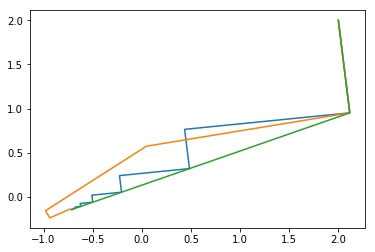

In [283]:
plt.plot([point[0] for point in desc_points], [point[1] for point in desc_points])
plt.plot([point[0] for point in conj_points], [point[1] for point in conj_points])
plt.plot([point[0] for point in bfgs_points], [point[1] for point in bfgs_points])
plt.show()